In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import matplotlib.ticker as ticker

In [45]:
df = pd.read_json('thewknd.json')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,release_date,popularity
0,0.582,0.525,1,-7.163,0,0.0627,0.11100,0.000000,0.1340,0.510,...,audio_features,2Ch7LmS7r2Gy2kc64wv3Bz,spotify:track:2Ch7LmS7r2Gy2kc64wv3Bz,https://api.spotify.com/v1/tracks/2Ch7LmS7r2Gy...,https://api.spotify.com/v1/audio-analysis/2Ch7...,260253,4,Die For You,2016-11-25,88
1,0.735,0.795,11,-6.523,0,0.1130,0.02960,0.000032,0.0678,0.905,...,audio_features,1nH2PkJL1XoUq8oE6tBZoU,spotify:track:1nH2PkJL1XoUq8oE6tBZoU,https://api.spotify.com/v1/tracks/1nH2PkJL1XoU...,https://api.spotify.com/v1/audio-analysis/1nH2...,188918,4,Sacrifice,2022-01-06,80
2,0.698,0.769,8,-7.154,1,0.0368,0.01280,0.001660,0.2380,0.354,...,audio_features,2vgUijXOTRMnWXDtvgMp2b,spotify:track:2vgUijXOTRMnWXDtvgMp2b,https://api.spotify.com/v1/tracks/2vgUijXOTRMn...,https://api.spotify.com/v1/audio-analysis/2vgU...,339023,4,Take My Breath,2022-01-06,74
3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,...,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,Blinding Lights,2020-03-20,91
4,0.667,0.721,7,-5.349,0,0.0330,0.00248,0.000062,0.0753,0.703,...,audio_features,1F65jvOrItxUyNK30z6Yht,spotify:track:1F65jvOrItxUyNK30z6Yht,https://api.spotify.com/v1/tracks/1F65jvOrItxU...,https://api.spotify.com/v1/audio-analysis/1F65...,237522,4,In Your Eyes,2021-02-05,53


In [46]:
#changing release_date to just year only
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [57]:
#move songname, popularity and release year ahead in the df
df.insert(0, 'name', df.pop('name'))
df.insert(1, 'year', df.pop('year'))
df.insert(2, 'popularity', df.pop('popularity'))
df.head()

,name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,release_date
0,Die For You,2016,88,0.582,0.525,1,-7.163,0,0.0627,0.11100,...,0.510,133.249,audio_features,2Ch7LmS7r2Gy2kc64wv3Bz,spotify:track:2Ch7LmS7r2Gy2kc64wv3Bz,https://api.spotify.com/v1/tracks/2Ch7LmS7r2Gy...,https://api.spotify.com/v1/audio-analysis/2Ch7...,260253,4,2016-11-25
1,Sacrifice,2022,80,0.735,0.795,11,-6.523,0,0.1130,0.02960,...,0.905,122.000,audio_features,1nH2PkJL1XoUq8oE6tBZoU,spotify:track:1nH2PkJL1XoUq8oE6tBZoU,https://api.spotify.com/v1/tracks/1nH2PkJL1XoU...,https://api.spotify.com/v1/audio-analysis/1nH2...,188918,4,2022-01-06
2,Take My Breath,2022,74,0.698,0.769,8,-7.154,1,0.0368,0.01280,...,0.354,121.020,audio_features,2vgUijXOTRMnWXDtvgMp2b,spotify:track:2vgUijXOTRMnWXDtvgMp2b,https://api.spotify.com/v1/tracks/2vgUijXOTRMn...,https://api.spotify.com/v1/audio-analysis/2vgU...,339023,4,2022-01-06
3,Blinding Lights,2020,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,...,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,2020-03-20
4,In Your Eyes,2021,53,0.667,0.721,7,-5.349,0,0.0330,0.00248,...,0.703,100.018,audio_features,1F65jvOrItxUyNK30z6Yht,spotify:track:1F65jvOrItxUyNK30z6Yht,https://api.spotify.com/v1/tracks/1F65jvOrItxU...,https://api.spotify.com/v1/audio-analysis/1F65...,237522,4,2021-02-05


In [48]:
df.shape

(156, 22)

In [49]:
#the playlist may contain some duplicates songs since they add everything, so singles which were put into album will be put twice
df = df.drop_duplicates()


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 155
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              148 non-null    object 
 1   year              148 non-null    int64  
 2   popularity        148 non-null    int64  
 3   danceability      148 non-null    float64
 4   energy            148 non-null    float64
 5   key               148 non-null    int64  
 6   loudness          148 non-null    float64
 7   mode              148 non-null    int64  
 8   speechiness       148 non-null    float64
 9   acousticness      148 non-null    float64
 10  instrumentalness  148 non-null    float64
 11  liveness          148 non-null    float64
 12  valence           148 non-null    float64
 13  tempo             148 non-null    float64
 14  type              148 non-null    object 
 15  id                148 non-null    object 
 16  uri               148 non-null    object 
 1

In [51]:
drop_columns = ['type', 'id', 'uri', 'track_href', 'analysis_url','release_date']

In [52]:
df1 = df.copy()
df1.drop(drop_columns, axis = 1, inplace = True)
df1.head()

,name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Die For You,2016,88,0.582,0.525,1,-7.163,0,0.0627,0.11100,0.000000,0.1340,0.510,133.249,260253,4
1,Sacrifice,2022,80,0.735,0.795,11,-6.523,0,0.1130,0.02960,0.000032,0.0678,0.905,122.000,188918,4
2,Take My Breath,2022,74,0.698,0.769,8,-7.154,1,0.0368,0.01280,0.001660,0.2380,0.354,121.020,339023,4
3,Blinding Lights,2020,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
4,In Your Eyes,2021,53,0.667,0.721,7,-5.349,0,0.0330,0.00248,0.000062,0.0753,0.703,100.018,237522,4


In [53]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,148.0,2018.128378,3.361002,2011.000000,2015.750000,2020.000000,2021.000000,2022.000
popularity,148.0,59.060811,21.178614,0.000000,53.750000,64.000000,71.250000,91.000
danceability,148.0,0.590534,0.130502,0.218000,0.511500,0.607000,0.680000,0.863
energy,148.0,0.621243,0.135643,0.260000,0.538500,0.630500,0.722000,0.959
key,148.0,4.594595,3.741363,0.000000,1.000000,5.000000,8.000000,11.000
loudness,148.0,-7.040811,1.861731,-12.756000,-8.129750,-7.029500,-5.526000,-3.715
mode,148.0,0.344595,0.476850,0.000000,0.000000,0.000000,1.000000,1.000
speechiness,148.0,0.080566,0.068698,0.027000,0.037225,0.053900,0.087100,0.351
acousticness,148.0,0.214588,0.220994,0.000582,0.032375,0.130000,0.359750,0.915
instrumentalness,148.0,0.018898,0.090246,0.000000,0.000000,0.000023,0.000206,0.812


In [54]:
#top 5 most famous tracks

top5most = df1.sort_values('popularity', ascending = False).head(5)
top5most

,name,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3,Blinding Lights,2020,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
12,Starboy,2016,89,0.679,0.587,7,-7.015,1,0.2760,0.14100,0.000006,0.1370,0.486,186.003,230453,4
0,Die For You,2016,88,0.582,0.525,1,-7.163,0,0.0627,0.11100,0.000000,0.1340,0.510,133.249,260253,4
35,The Hills,2015,88,0.585,0.564,0,-7.063,0,0.0515,0.06710,0.000000,0.1350,0.137,113.003,242253,4
33,Save Your Tears (with Ariana Grande) (Remix),2021,84,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,191014,4


Text(0.5, 1.0, 'Correlation Matrix of track data')

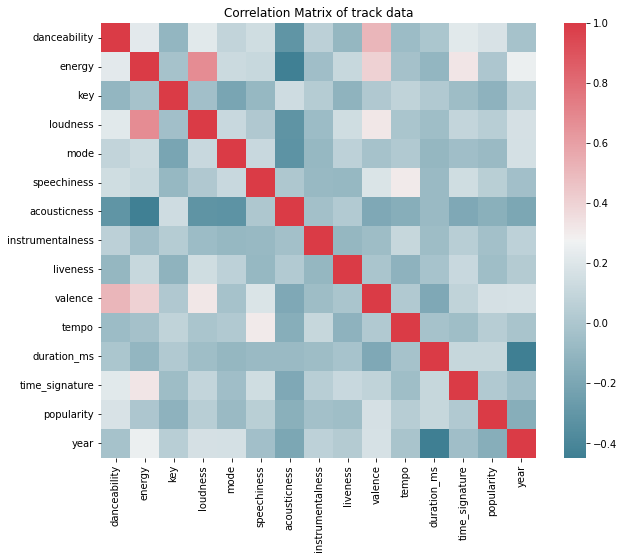

In [20]:
#getting correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix of track data')

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

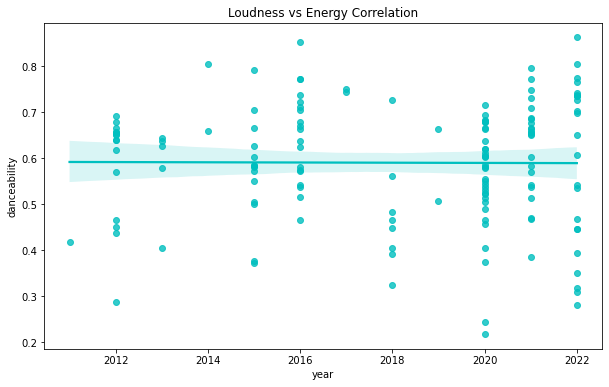

In [63]:
plt.figure(figsize=(10,6))
sns.regplot(data=df1, y='danceability', x='year', color='c').set(title='Loudness vs Energy Correlation')